# Práctica Ipython

## Análisis experimental Insertion Sort


Implementación Cormen

In [1]:
#def insertionSort(n):
#    j=1
#    while j<len(n):
#        llave=n[j]
#        i=j-1
#        while i>=0 and n[i]>llave:
#            n[i+1]=n[i]
#            i=i-1
#        n[i+1]=llave
#        j=j+1
        
def insertionSort2(A, p, r):
    for j in range(p + 1, r + 1):
        key = A[j]
        i = j - 1
        while i >= p and A[i] > key:
            A[i + 1] = A[i]
            i = i - 1
        A[i + 1] = key
        
def insertionSort(A):
    insertionSort2(A,0,len(A)-1)

Creación e inicialización de los arreglos.

In [2]:
import itertools
import math
import time

menor=4
mayor=6

arreglos=[]
for i in range(menor,mayor+1):
    lista=list(range(i))
    arreglos.append(lista)

print arreglos

[[0, 1, 2, 3], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5]]


### Cálculo de datos
Hacemos mil ordenamientos para cada una de las permutaciones de los arreglos, hallamos el promedio y tomamos este dato.

In [3]:
datos=[]
for arreglo in arreglos:
    tiempos=[0]*(math.factorial(len(arreglo)))
    #print tiempos
    permutaciones=list(itertools.permutations(arreglo))
    for n in xrange(1000):
        ind=0
        for i in permutaciones:
            lista=list(i)
            tInicial=time.clock()
            insertionSort(lista)
            tFinal=time.clock()
            tTotal=tFinal-tInicial
            tiempos[ind]+=tTotal
            ind+=1
        #print n, tiempos
        
    for n in xrange(len(tiempos)):
        tiempos[n]/=1000
        
    datos.append(tiempos)

mejores=[]
peores=[]
promedios=[]
    
for i in xrange(len(arreglos)):
    print "Arreglo de tamaño:",len(arreglos[i])
    print "Mejor:",datos[i][0]
    mejores.append(datos[i][0])
    print "Peor:",datos[i][len(datos[i])-1]
    peores.append(datos[i][len(datos[i])-1])
    prom=sum(datos[i])/len(datos[i])
    print "Promedio:",prom
    promedios.append(prom)
    #print datos[i][len(datos[i])-1]-datos[i][0]    
    print ""
    

Arreglo de tamaño: 4
Mejor: 2.37138554715e-06
Peor: 3.62863611975e-06
Promedio: 3.02025228258e-06

Arreglo de tamaño: 5
Mejor: 2.61827420834e-06
Peor: 4.81176307583e-06
Promedio: 3.77632267417e-06

Arreglo de tamaño: 6
Mejor: 2.8474872379e-06
Peor: 6.05019765347e-06
Promedio: 4.56897576303e-06



### Coeficientes e interpolación
Interpolamos con la función interpolate.

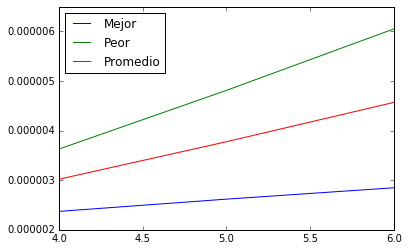

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

x = np.linspace(menor,mayor,mayor-menor+1,endpoint=True)
plt.plot(x,mejores,x,peores,x,promedios)
plt.legend(['Mejor','Peor','Promedio'],loc='best')

Hallamos los coeficientes usando la función polyfit.

In [5]:
x2 = np.arange(menor,mayor+1,1)

pm = np.polyfit(x2, mejores, 2)
pr = np.polyfit(x2, mejores, 2)
pp = np.polyfit(x2, mejores, 2)

print "Constantes para los polinomios:"
print "Pol mejr caso: ("+str(pm[0])+")x²+("+str(pm[1])+")x+("+str(pm[2])+")"
print "Pol prom caso: ("+str(pr[0])+")x²+("+str(pr[1])+")x+("+str(pr[2])+")"
print "Pol peor caso: ("+str(pp[0])+")x²+("+str(pp[1])+")x+("+str(pp[2])+")"

Constantes para los polinomios:
Pol mejr caso: (-8.83781581687e-09)x²+(3.26429003546e-07)x+(1.20707458604e-06)
Pol prom caso: (-8.83781581687e-09)x²+(3.26429003546e-07)x+(1.20707458604e-06)
Pol peor caso: (-8.83781581687e-09)x²+(3.26429003546e-07)x+(1.20707458604e-06)


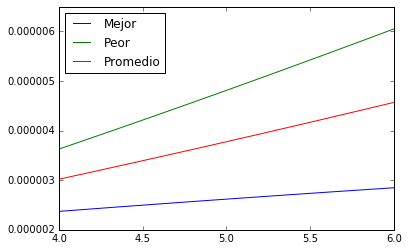

In [6]:
f1 = interp1d(x,mejores,kind='quadratic')
f2 = interp1d(x,peores,kind='quadratic')
f3 = interp1d(x,promedios,kind='quadratic')

x = np.linspace(menor,mayor,40,endpoint=True)

plt.plot(x,f1(x),x,f2(x),x,f3(x))
plt.legend(['Mejor','Peor','Promedio'],loc='best')

## Análisis de Insertion Sort + Merge Sort

Defenimos merge sort

In [7]:
def merge(A, p, q, r):
    L = A[p:q+1]+[float('inf')]
    R = A[q+1:r+1]+[float('inf')]
    i = 0
    j = 0
    for k in range(p, r + 1):
        if L[i] <= R[j]:
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1
            
def merge_sort_main(A, p, r):
    if p < r:
        q = int((p + r) / 2.0)
        merge_sort_main(A, p, q)
        merge_sort_main(A, q + 1, r)
        merge(A, p, q, r)

def mergeSort(A):
    merge_sort_main(A, 0, len(A) - 1)

Hacemos mil ordenamientos para arreglos de tamaños desde 4 hasta 104. Tomamos el promedio de estos datos y los graficamos para observar el punto de corte entre insertionSort() y mergeSort().

Punto de cruce o limite 78


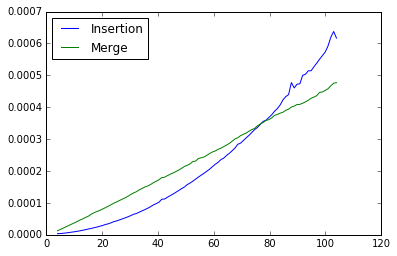

In [8]:
import random
from random import randint

minimo=4
maximo=104

datosI=[]
datosM=[]
arreglos=[]

for i in xrange(minimo,maximo):
    arreglos.append(list(range(i)))
    

for i in arreglos:
    suma=0
    for j in xrange(1000):
        random.shuffle(i,random.random)
        #print i,
        tInicial=time.clock()
        insertionSort(i)
        tFinal=time.clock()
        #print i, tFinal-tInicial
        suma+=(tFinal-tInicial)
    suma/=1000
    datosI.append(suma)
    
for i in arreglos:
    suma=0
    for j in xrange(1000):
        random.shuffle(i,random.random)
        tInicial=time.clock()
        mergeSort(i)
        tFinal=time.clock()
        suma+=(tFinal-tInicial)
    suma/=1000
    datosM.append(suma)

x = np.linspace(minimo,maximo,maximo-minimo,endpoint=True)
plt.plot(x,datosI,x,datosM)
plt.legend(['Insertion','Merge'],loc='best')

dist=1000
for i in xrange(maximo-minimo):
    if abs(datosI[i]-datosM[i])<dist:
        dist=abs(datosI[i]-datosM[i])
        cruce=i
        
print "Punto de cruce o limite",cruce+minimo


## Combinados
Con el punto de corte podemos crear una optimización combinando los algoritmos, haciendo que ordene con insertionSort() antes del límite hallado y con mergeSort() después del límite hallado. Para finalizar, hacemos mil ordenamientos como se hizo anteriormente con los algoritmos pero en este caso con la combinación y comparamos los resultados de los tiempos obtenidos.

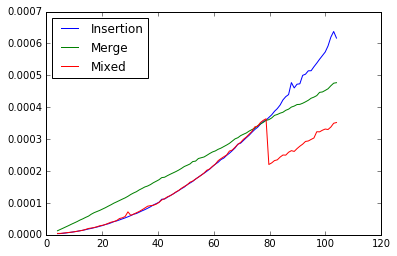

In [9]:
import sys
from itertools import repeat

sys.setrecursionlimit(1500)
threshold=cruce+minimo

def insertionSort2(A, p, r):
    for j in range(p + 1, r + 1):
        key = A[j]
        i = j - 1
        while i >= p and A[i] > key:
            A[i + 1] = A[i]
            i = i - 1
        A[i + 1] = key

def mixedSort(A, p, r):
    if r - p < threshold:
        insertionSort2(A,p,r)
    else:
        q = int((p + r) / 2.0)
        mixedSort(A, p, q)
        mixedSort(A, q + 1, r)
        merge(A, p, q, r)
        
        
datosC=[]

for i in arreglos:
    suma=0
    for j in xrange(1000):
        random.shuffle(i,random.random)
        #print i,
        tInicial=time.clock()
        mixedSort(i,0,len(i)-1)
        tFinal=time.clock()
        #print i, tFinal-tInicial
        suma+=(tFinal-tInicial)
    suma/=1000
    datosC.append(suma)
        
plt.plot(x,datosI,x,datosM,x,datosC)
plt.legend(['Insertion','Merge','Mixed'],loc='best')

Sin embargo, sí editamos el valor del límite o threshold a un valor mas pequeño (como 20) ya que ordenar arreglos de tamaño 80 por insertionSort() es bastante dispendioso, se notará una mejoría bastante mas alta que tomando el threshold con la intersección de insertionSort() y mergeSort().

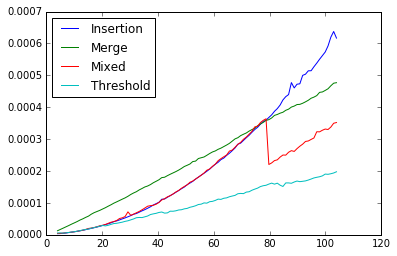

In [10]:
threshold=20

datosT=[]

for i in arreglos:
    suma=0
    for j in xrange(1000):
        random.shuffle(i,random.random)
        #print i,
        tInicial=time.clock()
        mixedSort(i,0,len(i)-1)
        tFinal=time.clock()
        #print i, tFinal-tInicial
        suma+=(tFinal-tInicial)
    suma/=1000
    datosT.append(suma)
        
plt.plot(x,datosI,x,datosM,x,datosC,x,datosT)
plt.legend(['Insertion','Merge','Mixed','Threshold'],loc='best')

## Conclusión
Se puede observar en la gráfica que la línea roja (algoritmo combinado) hace una notoria mejora en los tiempos de ordenamiento. Pero, tomando el límite o threshold con un número más pequeño como 20 (gráfica azul claro), hace una mejora todavía mas grande al algoritmo combinado. Es decir, se ha encontrado una optimización combinando las mejores partes de los algoritmos insertionSort() y mergeSort().